# Floodscan

In [1]:
%load_ext jupyter_black
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from adjustText import adjust_text

from src.datasources import floodscan, codab, worldpop
from src.constants import *

In [3]:
# floodscan.clip_nga_from_glb()

In [4]:
# floodscan.calculate_exposure_raster()

In [5]:
# floodscan.calculate_adm2_exposures()

In [6]:
adm2 = codab.load_codab(admin_level=2)
# adm2_aoi = adm2[adm2["ADM1_PCODE"].isin(AOI_ADM1_PCODES)]
adm1 = codab.load_codab(admin_level=1)
# adm1_aoi = adm1[adm1["ADM1_PCODE"].isin(AOI_ADM1_PCODES)]

In [7]:
pop = worldpop.load_raw_worldpop()
# pop_aoi = pop.rio.clip(adm2_aoi.geometry, all_touched=True)
# pop_aoi = pop_aoi.where(pop_aoi > 0)

In [8]:
fs_raster = floodscan.load_raw_nga_floodscan()
fs_raster = fs_raster.rio.write_crs(4326)
fs_aoi = fs_raster.rio.clip(adm2.geometry, all_touched=True)
fs_aoi_year = fs_aoi.groupby("time.year").max()
fs_aoi_mean = fs_aoi_year.mean(dim="year")

In [9]:
adm2_pop = worldpop.load_adm2_worldpop()

In [10]:
adm2_pop

,total_pop,ADM2_PCODE
0,131673.28,NG001001
1,554299.20,NG001002
2,150414.19,NG008001
3,199891.20,NG015001
4,195957.64,NG003001
...,...,...
769,358267.88,NG019022
770,669616.60,NG019023
771,172446.70,NG035016
772,408913.06,NG037014


In [11]:
exposure = floodscan.load_adm2_flood_exposures()
exposure = exposure.merge(adm2_pop, on="ADM2_PCODE")
exposure["frac_exposed"] = exposure["total_exposed"] / exposure["total_pop"]

In [12]:
exposure

,year,total_exposed,ADM2_PCODE,total_pop,frac_exposed
0,1998,0,NG001001,131673.28,0.000000
1,1999,0,NG001001,131673.28,0.000000
2,2000,0,NG001001,131673.28,0.000000
3,2001,0,NG001001,131673.28,0.000000
4,2002,0,NG001001,131673.28,0.000000
...,...,...,...,...,...
20119,2019,2133,NG022021,256444.38,0.008318
20120,2020,1340,NG022021,256444.38,0.005225
20121,2021,11317,NG022021,256444.38,0.044130
20122,2022,20113,NG022021,256444.38,0.078430


In [13]:
avg_exposure = (
    exposure.groupby("ADM2_PCODE").mean().reset_index().drop(columns=["year"])
)
int_cols = ["total_exposed", "total_pop"]
avg_exposure[int_cols] = avg_exposure[int_cols].astype(int)
avg_exposure_plot = adm2.merge(avg_exposure, on="ADM2_PCODE")
# avg_exposure_plot_aoi = avg_exposure_plot[
#     avg_exposure_plot["ADM1_PCODE"].isin(AOI_ADM1_PCODES)
# ]

In [14]:
avg_exposure_plot

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,SD_EN,SD_PCODE,geometry,total_exposed,total_pop,frac_exposed
0,0.237074,0.001524,Aba North,NG001001,Aba North,None,None,Abia,NG001,Nigeria,NG,2016-11-29,2019-04-17,None,Abia South,NG00103,"POLYGON ((7.40111 5.08195, 7.40013 5.08237, 7....",1609,131673,0.012222
1,0.262477,0.003531,Aba South,NG001002,Aba South,None,None,Abia,NG001,Nigeria,NG,2016-11-29,2019-04-17,None,Abia South,NG00103,"POLYGON ((7.38749 5.08275, 7.38632 5.08236, 7....",4095,554299,0.007388
2,3.075316,0.326868,Abadam,NG008001,Abadam,None,None,Borno,NG008,Nigeria,NG,2016-11-29,2019-04-17,None,Borno North,NG00802,"POLYGON ((13.83477 13.42336, 13.81909 13.42175...",25752,150414,0.171208
3,2.537984,0.068379,Abaji,NG015001,Abaji,None,None,Federal Capital Territory,NG015,Nigeria,NG,2016-11-29,2019-04-17,None,Federal Capital Territory,NG01501,"POLYGON ((7.04587 9.23050, 7.02654 9.22216, 7....",6448,199891,0.032258
4,0.687150,0.014529,Abak,NG003001,Abak,None,None,Akwa Ibom,NG003,Nigeria,NG,2016-11-29,2019-04-17,None,Akwa Ibom North West,NG00302,"POLYGON ((7.81124 5.09453, 7.81233 5.09367, 7....",0,195957,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,1.973339,0.192300,Zango-Kataf,NG019022,Zango-Kataf,None,None,Kaduna,NG019,Nigeria,NG,2016-11-29,2019-04-17,None,Kaduna South,NG01903,"POLYGON ((8.51617 9.73717, 8.51729 9.73228, 8....",3612,358267,0.010083
770,1.064112,0.032586,Zaria,NG019023,Zaria,None,None,Kaduna,NG019,Nigeria,NG,2016-11-29,2019-04-17,None,Kaduna North,NG01902,"POLYGON ((7.77154 11.12362, 7.77156 11.11693, ...",40856,669616,0.061015
771,1.186195,0.084464,Zing,NG035016,Zing,None,None,Taraba,NG035,Nigeria,NG,2016-11-29,2019-04-17,None,Taraba North,NG03502,"POLYGON ((11.78946 8.64357, 11.76143 8.66650, ...",388,172446,0.002253
772,2.611934,0.223538,Zurmi,NG037014,Zurmi,None,None,Zamfara,NG037,Nigeria,NG,2016-11-29,2019-04-17,None,Zamfara North,NG03702,"POLYGON ((7.04768 12.99911, 7.04995 12.97205, ...",10278,408913,0.025136


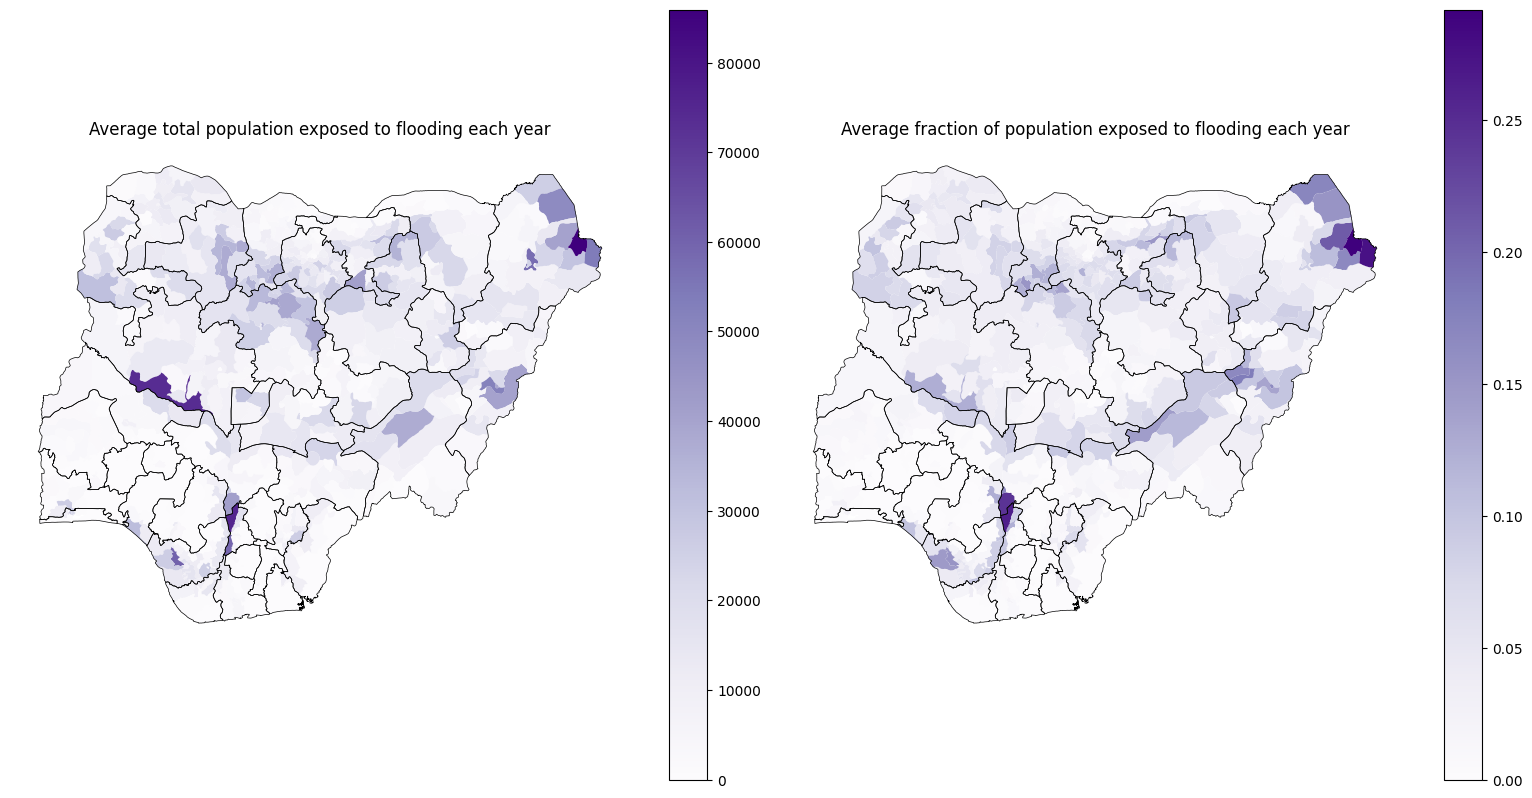

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

for j, variable in enumerate(["total_exposed", "frac_exposed"]):
    avg_exposure_plot.plot(
        column=variable, ax=axs[j], legend=True, cmap="Purples"
    )
    # for index, row in (
    #     avg_exposure_plot_aoi.sort_values(variable).iloc[-10:].iterrows()
    # ):
    #     centroid = row["geometry"].centroid

    #     axs[j].annotate(
    #         row["ADM2_EN"],
    #         xy=(centroid.x, centroid.y),
    #         xytext=(0, 0),
    #         textcoords="offset points",
    #         ha="center",
    #         va="center",
    #     )

    adm1.boundary.plot(ax=axs[j], linewidth=0.5, color="k")
    axs[j].axis("off")


axs[0].set_title("Average total population exposed to flooding each year")
axs[1].set_title(
    "Average fraction of population exposed to flooding each year"
)

plt.subplots_adjust(wspace=0)

In [16]:
cols = [
    # "ADM1_PCODE",
    "ADM1_EN",
    "ADM2_PCODE",
    "ADM2_EN",
    # "total_pop",
    "total_exposed",
    "frac_exposed",
    # "geometry",
]
avg_exposure_plot[cols].sort_values("total_exposed", ascending=False).iloc[
    :10
].style.background_gradient(cmap="Purples")

,ADM1_EN,ADM2_PCODE,ADM2_EN,total_exposed,frac_exposed
524,Borno,NG008025,Ngala,85934,0.291685
52,Anambra,NG004003,Anambra West,75807,0.262361
507,Niger,NG027017,Mokwa,73758,0.124795
745,Delta,NG010024,Warri South,60179,0.152889
563,Anambra,NG004016,Ogbaru,59346,0.094496
387,Borno,NG008013,Jere,57577,0.085340
405,Borno,NG008015,Kala/Balge,53787,0.275651
763,Adamawa,NG002021,Yola South,51940,0.135207
446,Borno,NG008017,Kukawa,48488,0.153442
279,Kogi,NG023006,Ibaji,41414,0.244411


In [17]:
cols = [
    "ADM1_PCODE",
    "ADM1_EN",
    "ADM2_PCODE",
    "ADM2_EN",
    "total_pop",
    "total_exposed",
    "frac_exposed",
    # "geometry",
]
filename = "nga_wholecountry_adm2_average_flood_exposed.csv"
avg_exposure_plot[cols].sort_values("total_exposed", ascending=False).to_csv(
    floodscan.PROC_FS_DIR / filename, index=False
)

In [19]:
exposure_raster = floodscan.load_raster_flood_exposures()
# exposure_raster_aoi = exposure_raster.rio.clip(
#     adm2_aoi.geometry, all_touched=True
# )

In [116]:
exposure_raster_aoi_mean = exposure_raster_aoi.mean(dim="year")
exposure_raster_aoi_mean = exposure_raster_aoi_mean.where(
    exposure_raster_aoi_mean > 5
)

In [141]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 20))

# pop
pop_aoi.plot(ax=axs[0], cmap="Greys", vmax=1000, add_colorbar=False)
axs[0].set_title("Population, 2020")

# flooding
fs_aoi_mean.plot(ax=axs[1], cmap="Blues", add_colorbar=False)
axs[1].set_title("Mean of maximum yearly flooded fraction, 1998-2023")

# exposure
exposure_raster_aoi_mean.plot(
    ax=axs[2], cmap="Purples", vmax=100, add_colorbar=False
)
axs[2].set_title("Average population exposued to flooding, 1998-2023")

for ax in axs:
    adm2_aoi.boundary.plot(ax=ax, linewidth=0.2, color="k")
    ax.axis("off")

plt.subplots_adjust(wspace=0.2)

In [25]:
exposure_raster_df = exposure_raster.to_dataframe("pop_exposed")[
    "pop_exposed"
].reset_index()

In [28]:
exposure_raster_df